In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

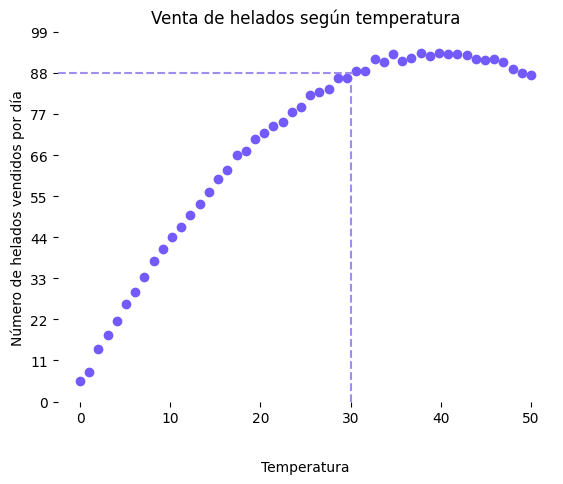

In [3]:
def f(x):
    return -(x - 40)**2 + 90

# Generate x values
x_values = np.linspace(0, 50, 50)

# Generate y values with some deviation using random noise
deviation = 10
y_values = f(x_values) + np.random.normal(0, deviation, len(x_values))

# Plot the original function and the noisy data
plt.scatter(x_values, y_values, color=(115/255, 91/255, 251/255), label='Noisy Data')
plt.title('Venta de helados según temperatura')
plt.xlabel('Temperatura', labelpad=25)
plt.ylabel('Número de helados vendidos por día')
plt.axvline(x = 30, ymax = 0.86, ls = '--', color = (161/255, 141/255, 238/255))
plt.axhline(y = 0, xmax = 0.6, ls = '--', color = (161/255, 141/255, 238/255))
y_ticks_labels = np.arange(0, 100, 11)
plt.yticks(ticks = plt.yticks()[0], labels = y_ticks_labels)

plt.box(False)
plt.savefig('../../Memoria/imgs/intra',  bbox_inches='tight')

plt.show()

####### SI DA ERROR, VOLVER A COMPILAR, O CAMBIAR LOS VALORES DE YTICKS a y_ticks_labels = np.arange(0, 100, 11)  Y 
#######  Y LUEGO VOLVER A PONER LOS QUE ESTÁN

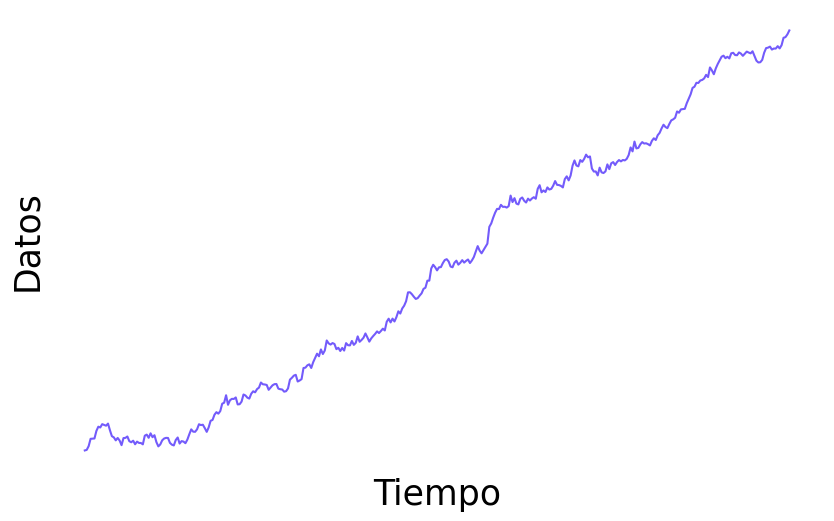

In [22]:
# Configuración de la semilla aleatoria para reproducibilidad
np.random.seed(42)

fecha_inicio = pd.to_datetime("2022-01-01")
fecha_final = pd.to_datetime("2022-12-31")
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_final, freq='D')

# Generar datos con una tendencia ascendente más pronunciada
datos = np.cumsum(np.random.randn(len(rango_fechas))) + 100 + np.linspace(0, 100, len(rango_fechas))

# Crear un DataFrame con los datos
df = pd.DataFrame({'Fecha': rango_fechas, 'Datos': datos})

# Crear gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Datos'], color=(115/255, 91/255, 251/255))

# Remover xticks y yticks
plt.xticks([])
plt.yticks([])

# Configurar etiquetas y título
plt.xlabel('Tiempo', fontsize=25)
plt.ylabel('Datos', fontsize=25)

plt.box(False)

#plt.savefig('../../Memoria/imgs/tendencia')
plt.show()

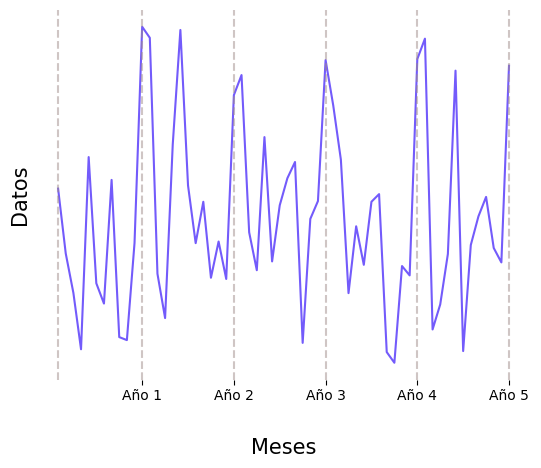

In [5]:
import matplotlib.ticker as ticker

# Parameters
np.random.seed(50)

years = 5
months_per_year = 12
sales_mean = 1000
sales_std = 200
increase_factor = 1.5  # Increase in sales during December and January

# Generate sales data
sales_data = []
for year in range(years):
    for month in range(months_per_year):
        if month in [11, 0]:  # December and January
            sales = np.random.normal(sales_mean * increase_factor, sales_std)
        else:
            sales = np.random.normal(sales_mean, sales_std)
        sales_data.append(sales)

# Plot sales data
plt.plot(sales_data, color=(115/255, 91/255, 251/255))
plt.xlabel("Meses", fontsize = 15, labelpad = 25)
plt.ylabel("Datos", fontsize = 15)
plt.yticks([])

# Set x-axis tick labels to indicate the beginning of each year
plt.xticks(np.arange(11, years * months_per_year+11, months_per_year), 
           [f"Año {i+1}" for i in range(years)])

# Add vertical dashed lines on top of each xtick label
for year_start in np.arange(0, years * months_per_year+11, months_per_year):
    if year_start > 0:
        year_start -= 1
    plt.axvline(x=year_start, color=(161/255, 141/255, 138/255), linestyle='--', alpha = 0.5)

plt.box(False)
#plt.savefig('../../Memoria/imgs/seasonality',  bbox_inches='tight') #bbox_inches is necessary because otherwise, the xlabel
                                                  # is not captured when saving the image
plt.show()

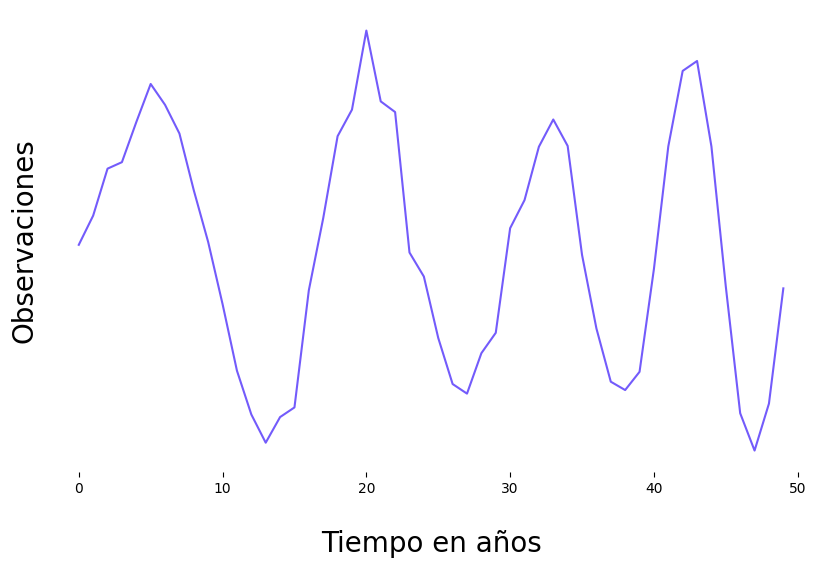

In [6]:
# Parámetros
num_points = 50
mean_value = 0
noise_level = 2  # Nivel de ruido

# Función de amplitud irregular
def irregular_amplitude(t):
    return np.abs(15 * np.sin(0.1 * t)) + 10  # Función de amplitud

# Función para variar el período del ciclo con el tiempo
def variable_cycle_period(t):
    return 20 * np.exp(-0.01 * t)  # Período que disminuye exponencialmente con el tiempo

# Generar datos de la serie de tiempo con amplitudes irregulares y período variable
t = np.arange(num_points)
cycle_component = np.sin(2 * np.pi * t / variable_cycle_period(t))
irregular_cycle_component = irregular_amplitude(t) * cycle_component
noise = np.random.normal(0, noise_level, size=num_points)  # Generar ruido
time_series = irregular_cycle_component + mean_value + noise  # Sumar ruido

# Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, time_series, color=(115/255, 91/255, 251/255))
plt.xlabel('Tiempo en años', fontsize = 20, labelpad = 25)
plt.ylabel('Observaciones', fontsize = 20)

# Remover xticks y yticks

plt.yticks([])

plt.box(False)
#plt.savefig('../../Memoria/imgs/ciclo',  bbox_inches='tight')#bbox_inches is necessary because otherwise, the xlabel
                                                  # is not captured when saving the image

plt.show()

[]

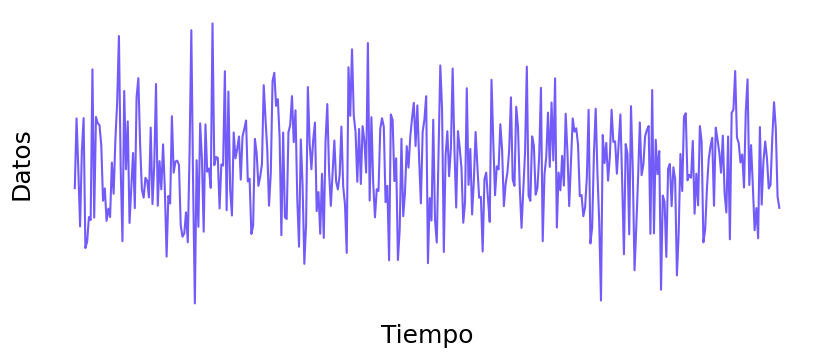

In [7]:
#Ahora vamos a plotear una serie temporal que solo tenga ruido. Y vamos a ver su tendencia y estacionalidad
serie_temporal_ruido = []
#nos creamos 400 valores aleatorios provenientes de una distribución normal guassiana con media 0 y desviación típica 1
errors = np.random.normal(0, 1, 400)
serie_temporal_ruido = errors.tolist()
    
#vamos a ver la serie temporal resultante
plt.figure(figsize=(10,4))
plt.plot(serie_temporal_ruido, color=(115/255, 91/255, 251/255))
plt.xlabel('Tiempo', fontsize = 18)
plt.ylabel('Datos', fontsize = 18)

# Remover xticks y yticks
plt.xticks([])
plt.yticks([])

plt.box(False)
#plt.savefig('../../Memoria/imgs/ruido')
plt.plot()

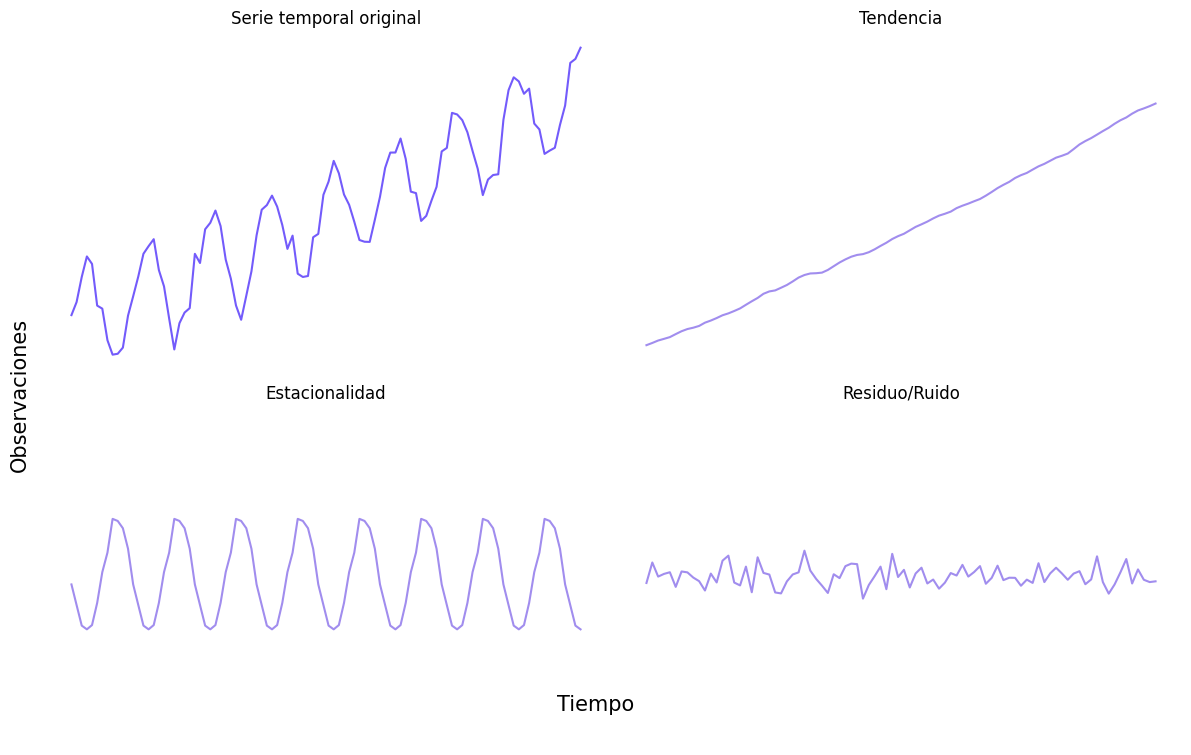

In [8]:
# Generate time series data
np.random.seed(0)
n = 100
t = np.arange(n)
trend = 0.5 * t  # Linear trend
seasonality = 10 * np.sin(2 * np.pi * t / 12)  # Seasonality
noise = np.random.normal(0, 2, n)  # Gaussian noise

# Combine components to create the time series
time_series = trend + seasonality + noise

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive', period=12)

# Plot the decomposition using plt.subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axs[0, 0].plot(time_series, color=(115/255, 91/255, 251/255))
axs[0, 0].set_title('Serie temporal original')

axs[0, 1].plot(decomposition.trend, color = (161/255, 141/255, 238/255))
axs[0, 1].set_ylim(0, 60)
axs[0, 1].set_title('Tendencia')

axs[1, 0].plot(decomposition.seasonal, color = (161/255, 141/255, 238/255))
axs[1, 0].set_ylim(30, -30)
axs[1, 0].set_title('Estacionalidad')

axs[1, 1].plot(decomposition.resid, color = (161/255, 141/255, 238/255))
axs[1, 1].set_ylim(30, -30)
axs[1, 1].set_title('Residuo/Ruido')

for i in range(0,2):
    for j in range(0,2):
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        
fig.supxlabel('Tiempo',  ha='center', fontsize = 15, y = 0.1)
fig.supylabel('Observaciones',  ha='center', fontsize = 15)

#plt.savefig('../../Memoria/imgs/componentes')
plt.tight_layout()
plt.show()

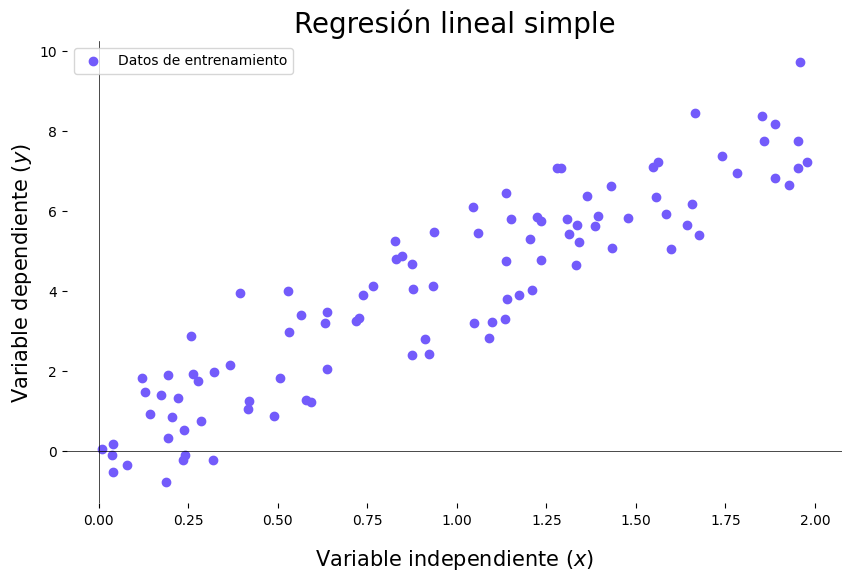

In [9]:
# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Variables independientes
y = 4 * X + np.random.randn(100, 1) # Variable dependiente con ruido



# Plotear los puntos y la recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color=(115/255, 91/255, 251/255), label='Datos de entrenamiento')

plt.xlabel('Variable independiente ($x$)', fontsize = 15, labelpad = 15)
plt.ylabel(r'Variable dependiente ($y$)', fontsize = 15)
plt.title(r'Regresión lineal simple', fontsize = 20)
# Añadir ejes x e y
plt.axhline(0, color='black', linewidth=0.5)  # Eje x
plt.axvline(0, color='black', linewidth=0.5)  # Eje y

plt.legend(loc='upper left')
plt.box(False)

#plt.savefig('../../Memoria/imgs/reg_lineal')
plt.show()

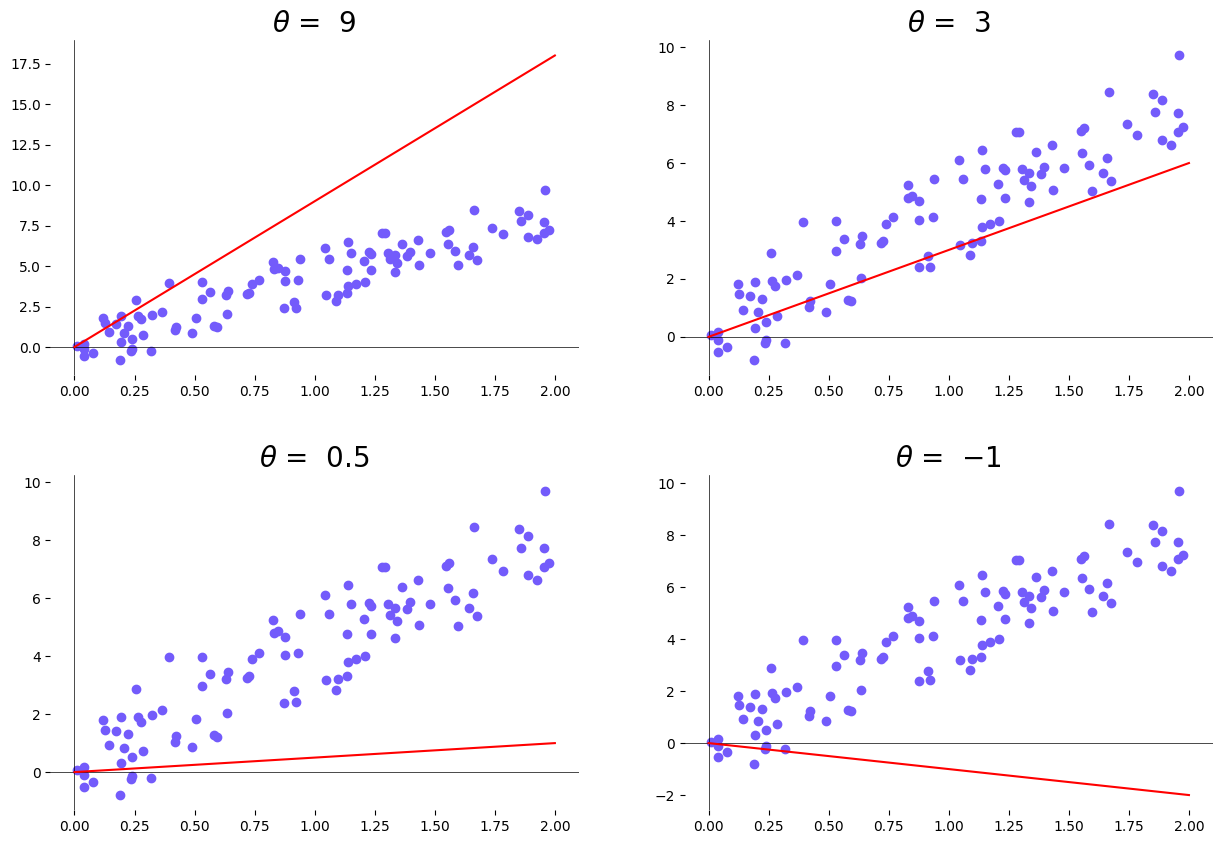

In [10]:
# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Variables independientes
y = 4 * X + np.random.randn(100, 1)  # Variable dependiente con ruido

# Pendientes de las rectas lineales
slopes = [9, 3, 0.5, -1]

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
    # Plotear los puntos de datos
    ax.scatter(X, y, color=(115/255, 91/255, 251/255), label='Datos de entrenamiento')
    ax.set_title(r'$\theta$ =  ${}$'.format(slopes[i]), fontsize=20)
       
    # Añadir ejes x e y
    ax.axhline(0, color='black', linewidth=0.5)  # Eje x
    ax.axvline(0, color='black', linewidth=0.5)  # Eje y
    
    # Calcular y trazar la recta de regresión con la pendiente actual
    x_values = np.linspace(0, 2, 100)
    y_values = slopes[i] * x_values
    ax.plot(x_values, y_values, color='red', label=f'Pendiente {slopes[i]}$x$')
    
for i in range(0,2):
    for j in range(0,2):
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)
    

# Ajustar espacio entre subplots
plt.subplots_adjust(hspace=0.3)
#plt.savefig('../../Memoria/imgs/valores_theta')
plt.show()

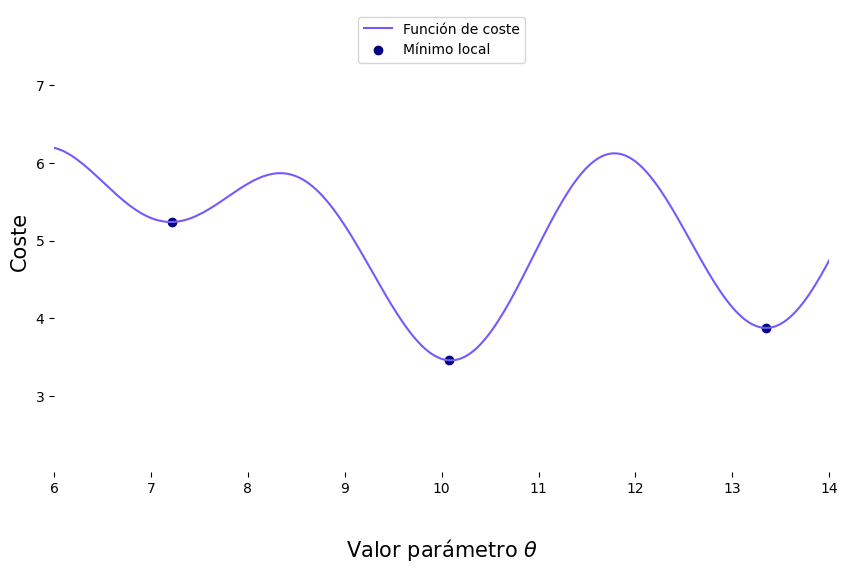

In [11]:
def my_function(x):
    return np.sin(x) + np.sin(1.25*x) - np.sin(2*x) + 5

# Generate data
x = np.linspace(-5*np.pi, 5*np.pi, 1000)
y = my_function(x)

# Find local minimums
local_minima_x = []
local_minima_y = []
for i in range(1, len(x)-1):
    if y[i] < y[i-1] and y[i] < y[i+1]:
        local_minima_x.append(x[i])
        local_minima_y.append(y[i])

# Plot function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Función de coste', color=(115/255, 91/255, 251/255))

# Plot local minimums
plt.scatter(local_minima_x, local_minima_y,color = 'navy', label='Mínimo local')

# Set labels
plt.xlabel(r'Valor parámetro $\theta$', fontsize = 15, labelpad = 30)
plt.ylabel('Coste', fontsize = 15)

plt.xlim(6, 14)

plt.legend(loc= 'upper center')
plt.box(False)

#plt.savefig('../../Memoria/imgs/no-convexa', bbox_inches='tight')#bbox_inches is necessary because otherwise, the xlabel
                                                  # is not captured when saving the image)
plt.show()

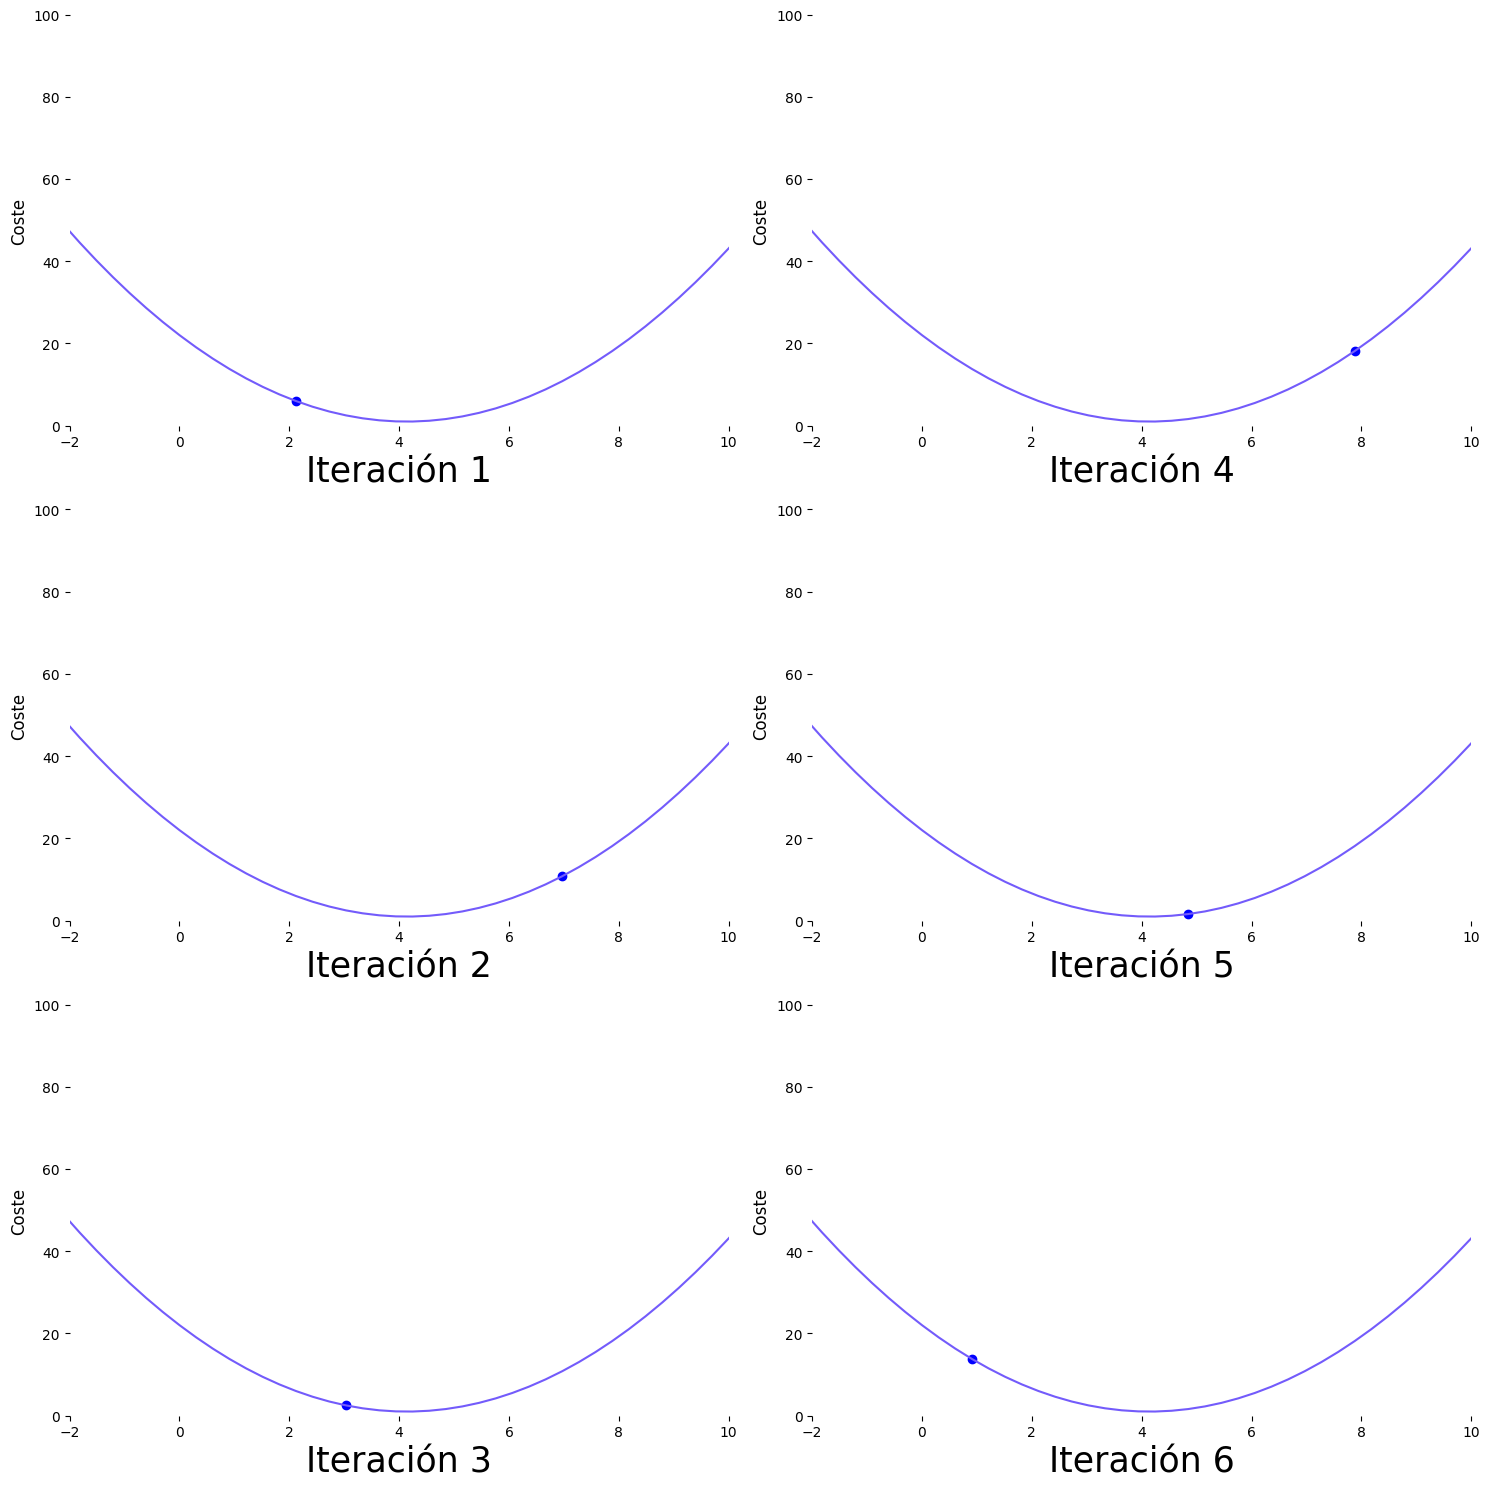

In [12]:
# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Variables independientes
y = 4 * X + np.random.randn(100, 1)  # Variable dependiente con ruido

# Definir valores de pendiente para evaluar
slopes = np.linspace(-10, 20, 100)

# Calcular el error cuadrático medio (MSE) para cada pendiente
mse_values = []
for slope in slopes:
    y_pred = slope * X
    mse = np.mean((y - y_pred)**2)
    mse_values.append(mse)

# Puntos a graficar
points = np.array([2, 7, 3, 8, 5, 1])

# Crear subtramas
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Iterar sobre cada punto y crear una gráfica
for i, point in enumerate(points):
    # Encontrar el índice correspondiente al valor del punto
    closest_index = np.abs(slopes - point).argmin()
    x_point = slopes[closest_index]
    mse_point = mse_values[closest_index]
    
    # Calcular el color de la gráfica
    color = 'navy' if point == 9 else 'blue'
    
    # Determinar la posición de la subtrama (cambio aquí)
    row = i % 3
    col = i // 3
    
    # Graficar la función de coste (MSE) en función de la pendiente
    axs[row, col].plot(slopes, mse_values, color=(115/255, 91/255, 251/255))
    
    # Marcar el punto asociado
    axs[row, col].scatter(x_point, mse_point, color=color)
    
    # Añadir etiquetas y límites
    axs[row, col].set_xlabel(f'Iteración {i+1}', fontsize=25)
    axs[row, col].set_ylabel('Coste', fontsize=12)
    axs[row, col].set_xlim(-2, 10)
    axs[row, col].set_ylim(0, 100)
    
for i in range(0,3):
    for j in range(0,2):
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)

# Ajustar espaciado entre subtramas
plt.tight_layout()
#plt.savefig('../../Memoria/imgs/lr_alto', bbox_inches='tight')#bbox_inches is necessary because otherwise, the xlabel
                                                  # is not captured when saving the image)
plt.show()

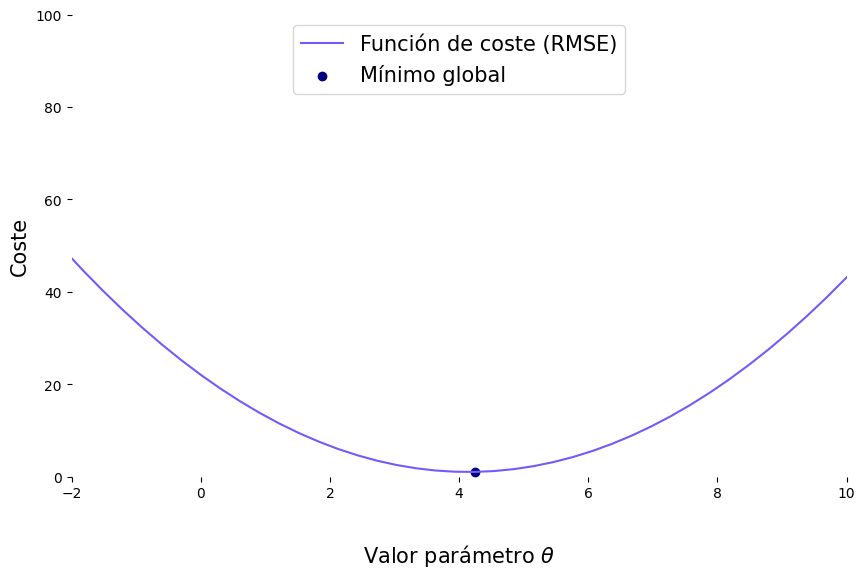

In [20]:
# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Variables independientes
y = 4 * X + np.random.randn(100, 1)  # Variable dependiente con ruido

# Encontrar el índice del valor mínimo de MSE
min_index = np.argmin(mse_values)
min_slope = slopes[min_index]
min_mse = mse_values[min_index]


# Definir valores de pendiente para evaluar
slopes = np.linspace(-10, 20, 100)

# Calcular el error cuadrático medio (MSE) para cada pendiente
mse_values = []
for slope in slopes:
    y_pred = slope * X
    mse = np.mean((y - y_pred)**2)
    mse_values.append(mse)

# Plotear la función de coste (MSE) en función de la pendiente
plt.figure(figsize=(10, 6))
plt.plot(slopes, mse_values, color=(115/255, 91/255, 251/255), label = 'Función de coste (RMSE)')
plt.scatter(min_slope, min_mse, color = 'navy', label=f'Mínimo global')

plt.xlabel(r'Valor parámetro $\theta$', fontsize=15, labelpad = 30)
plt.ylabel('Coste', fontsize=15)
plt.xlim (-2, 10)
plt.ylim(0, 100)


plt.box(False)
plt.legend(loc= 'upper center', fontsize = 15)


#plt.savefig('../../Memoria/imgs/func_coste', bbox_inches='tight')#bbox_inches is necessary because otherwise, the xlabel
                                                  # is not captured when saving the image)
plt.show()

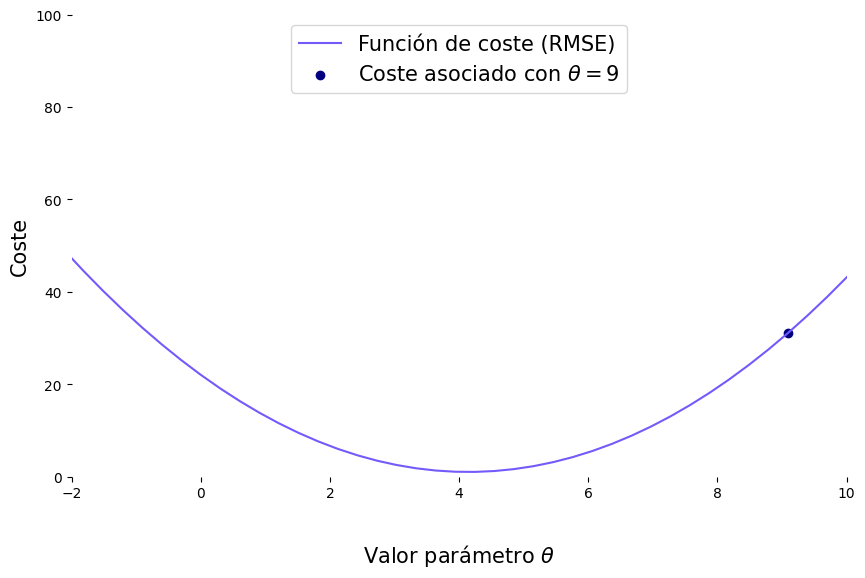

In [21]:
# Encontrar el índice correspondiente al valor x = 9
x_value = 9
closest_index = np.abs(slopes - x_value).argmin()

# Obtener el valor de la pendiente y el MSE asociado
x_9 = slopes[closest_index]
mse_9 = mse_values[closest_index]

# Plotear la función de coste (MSE) en función de la pendiente
plt.figure(figsize=(10, 6))
plt.plot(slopes, mse_values, color=(115/255, 91/255, 251/255), label = 'Función de coste (RMSE)')

# Marcar el punto asociado con x = 9
plt.scatter(x_9, mse_9, color='navy', label=r'Coste asociado con $\theta = {}$'.format(x_value))

plt.xlabel(r'Valor parámetro $\theta$', fontsize=15, labelpad=30)
plt.ylabel('Coste', fontsize=15)
plt.xlim(-2, 10)
plt.ylim(0, 100)

plt.box(False)
plt.legend(loc='upper center', fontsize = 15)

#plt.savefig('../../Memoria/imgs/valor9', bbox_inches='tight')#bbox_inches is necessary because otherwise, the xlabel
                                                  # is not captured when saving the image)
plt.show()

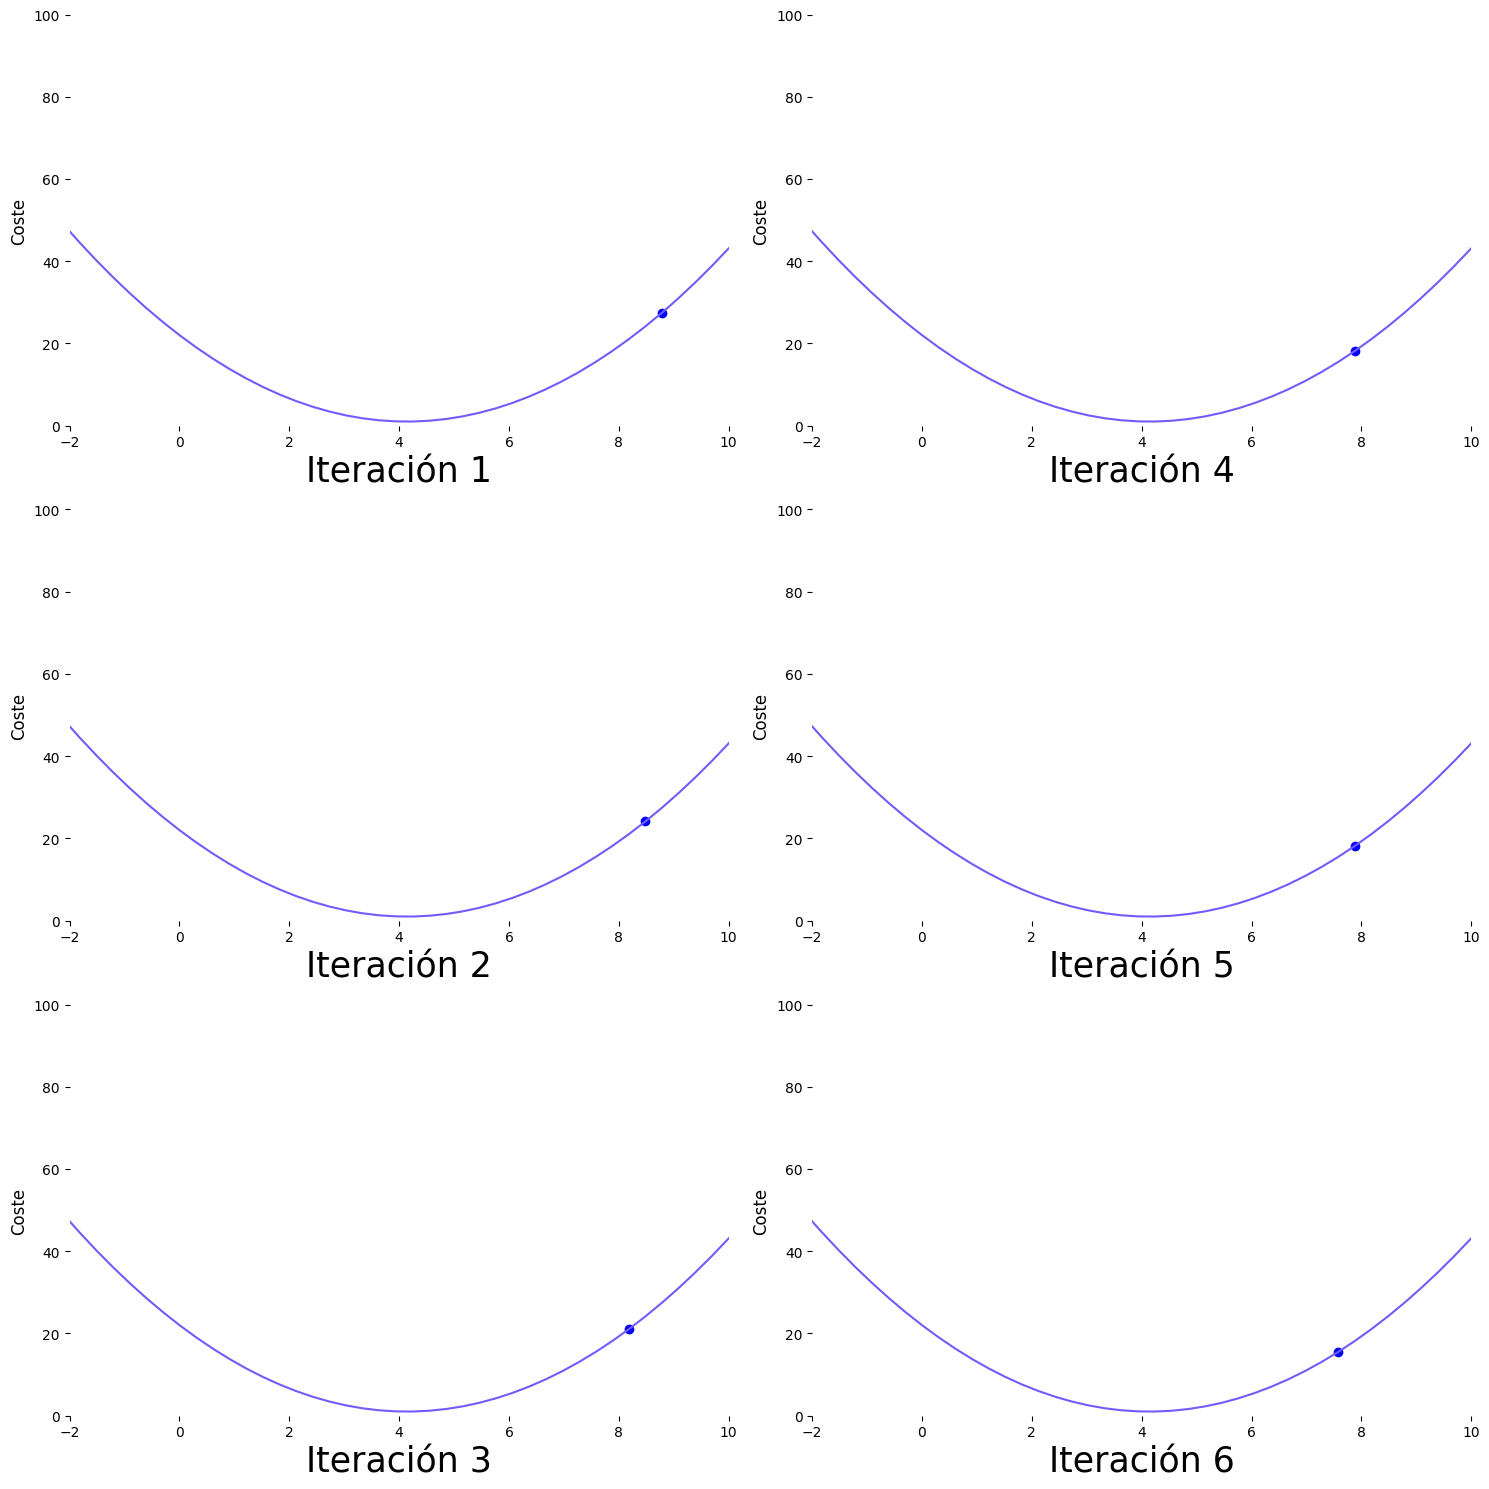

In [15]:
# Puntos a graficar
points = [8.87, 8.5, 8.25, 8, 7.75, 7.5]

# Crear subtramas
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Iterar sobre cada punto y crear una gráfica
for i, point in enumerate(points):
    # Encontrar el índice correspondiente al valor del punto
    closest_index = np.abs(slopes - point).argmin()
    x_point = slopes[closest_index]
    mse_point = mse_values[closest_index]
    
    # Calcular el color de la gráfica
    color = 'navy' if point == 9 else 'blue'
    
    # Determinar la posición de la subtrama
    col = i // 3
    row = i % 3
    
    # Graficar la función de coste (MSE) en función de la pendiente
    axs[row, col].plot(slopes, mse_values, color=(115/255, 91/255, 251/255))
    
    # Marcar el punto asociado
    axs[row, col].scatter(x_point, mse_point, color=color)
    
    # Añadir etiquetas y límites
    axs[row, col].set_xlabel(f'Iteración {i+1}', fontsize=25)
    axs[row, col].set_ylabel('Coste', fontsize=12)
    axs[row, col].set_xlim(-2, 10)
    axs[row, col].set_ylim(0, 100)
    
for i in range(0,3):
    for j in range(0,2):
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)

# Ajustar espaciado entre subtramas
plt.tight_layout()
#plt.savefig('../../Memoria/imgs/lr_bajo', bbox_inches='tight')#bbox_inches is necessary because otherwise, the xlabel
                                                  # is not captured when saving the image)
plt.show()

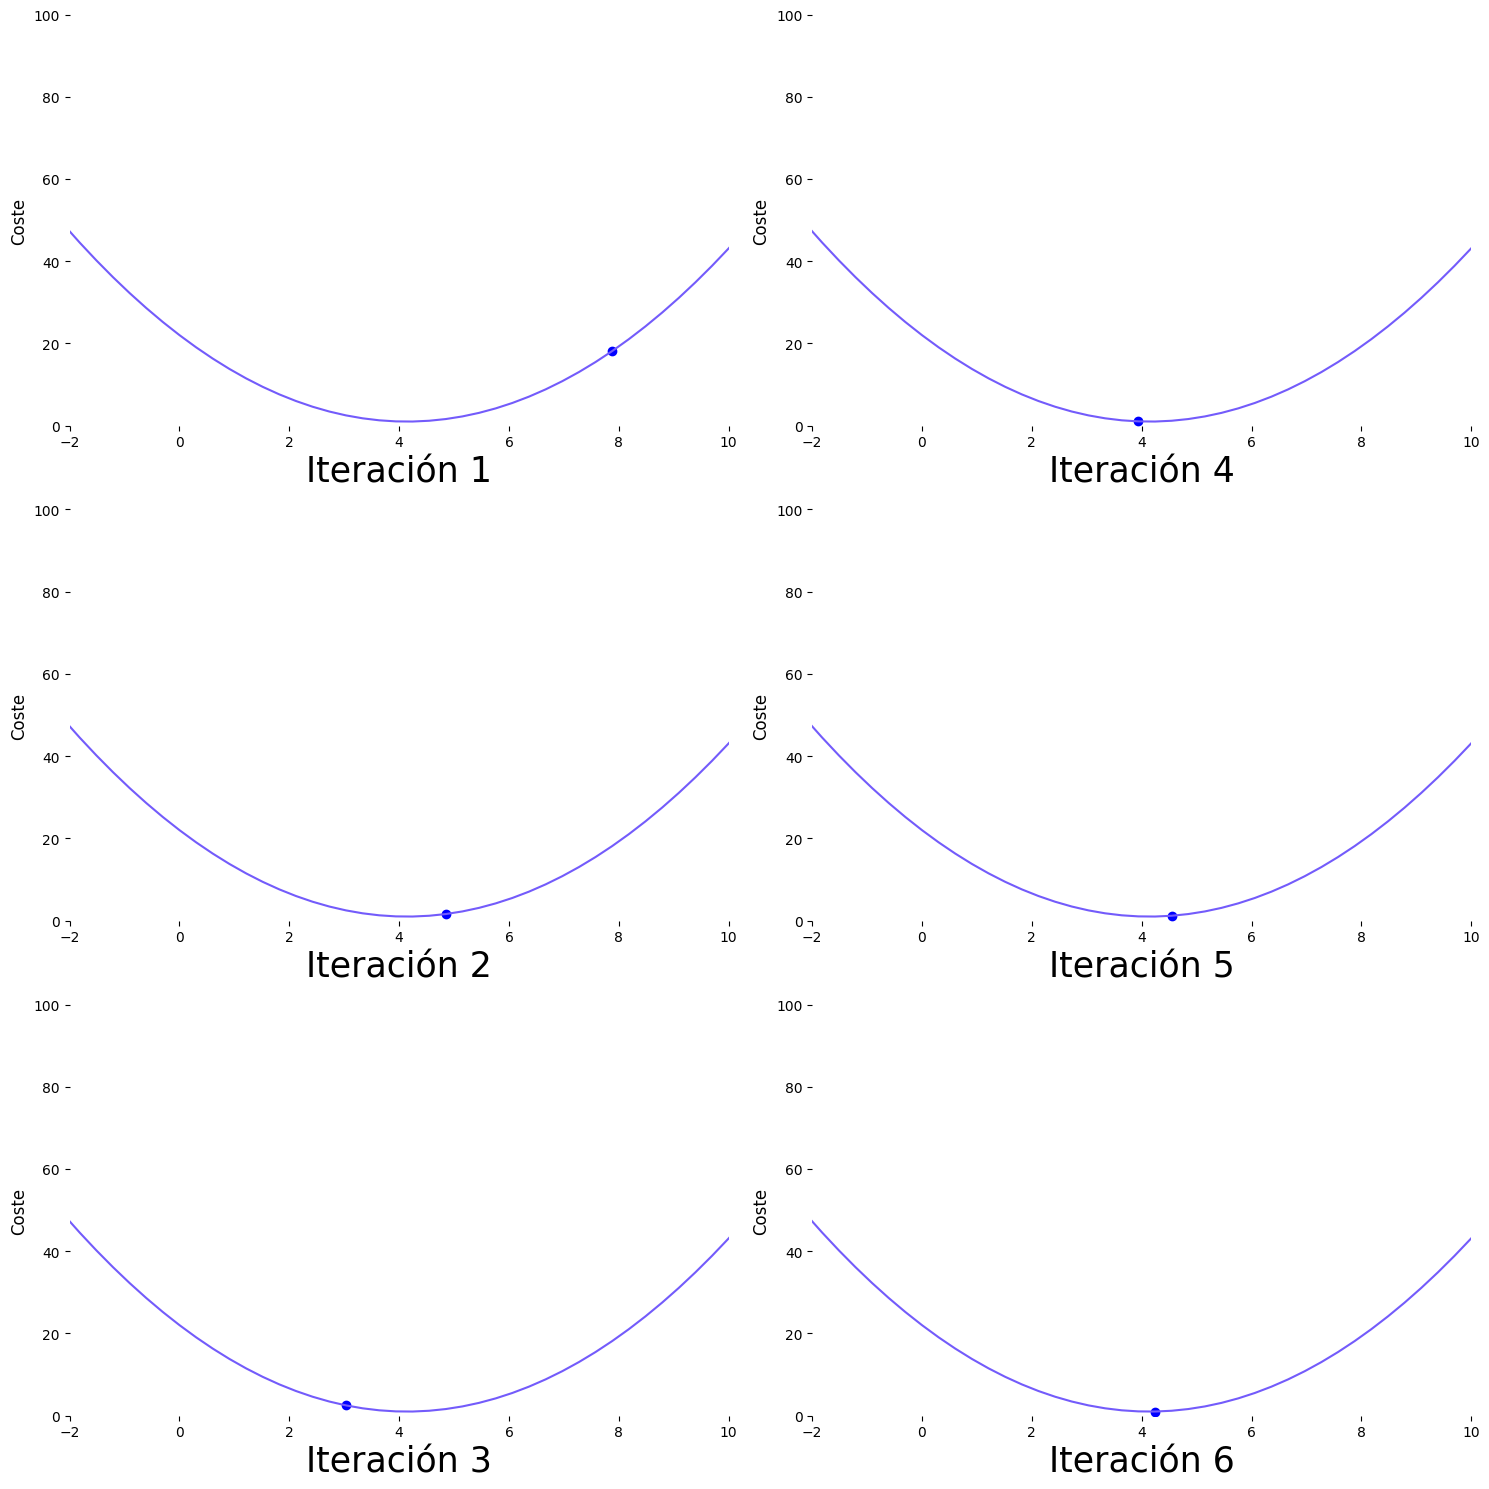

In [16]:
# Puntos a graficar
points = [8, 5, 3, 3.9, 4.5, 4.24]

# Crear subtramas
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Iterar sobre cada punto y crear una gráfica
for i, point in enumerate(points):
    # Encontrar el índice correspondiente al valor del punto
    closest_index = np.abs(slopes - point).argmin()
    x_point = slopes[closest_index]
    mse_point = mse_values[closest_index]
    
    # Calcular el color de la gráfica
    color = 'navy' if point == 9 else 'blue'
    
    # Determinar la posición de la subtrama
    col = i // 3  # Cambiado a división entera por columna primero
    row = i % 3   # Resto por fila
    
    # Graficar la función de coste (MSE) en función de la pendiente
    axs[row, col].plot(slopes, mse_values, color=(115/255, 91/255, 251/255))
    
    # Marcar el punto asociado
    axs[row, col].scatter(x_point, mse_point, color=color)
    
    # Añadir etiquetas y límites
    axs[row, col].set_xlabel(f'Iteración {i+1}', fontsize=25)
    axs[row, col].set_ylabel('Coste', fontsize=12)
    axs[row, col].set_xlim(-2, 10)
    axs[row, col].set_ylim(0, 100)
    
for i in range(0,3):
    for j in range(0,2):
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)

# Ajustar espaciado entre subtramas
plt.tight_layout()

#plt.savefig('../../Memoria/imgs/lr_adecuado', bbox_inches='tight')#bbox_inches is necessary because otherwise, the xlabel
                                                  # is not captured when saving the image)
plt.show()

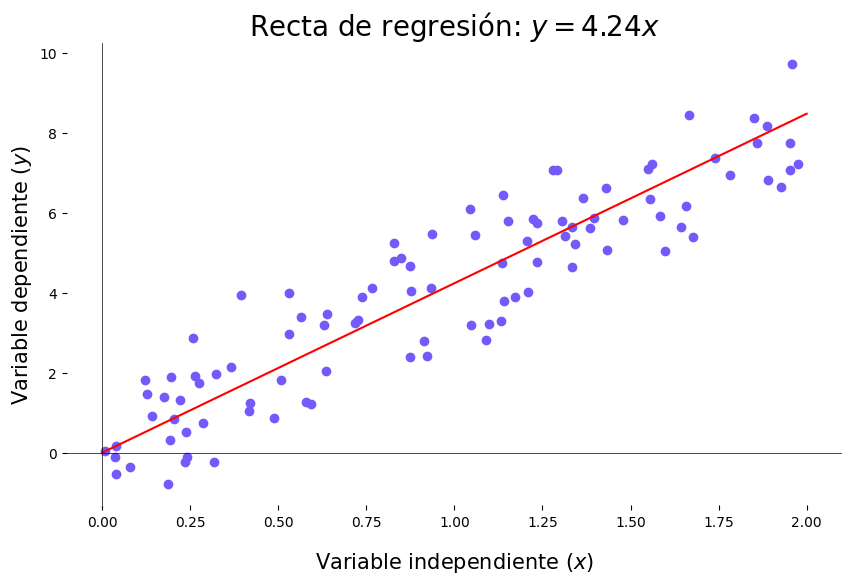

In [17]:
# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Variables independientes
y = 4 * X + np.random.randn(100, 1)  # Variable dependiente con ruido

# Definir el rango de valores de x para la recta lineal
x_values = np.linspace(0, 2, 100)

# Calcular los valores correspondientes de y para la recta lineal
y_values = 4.24 * x_values

# Plotear los puntos y la recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color=(115/255, 91/255, 251/255))
plt.plot(x_values, y_values, color='red')

plt.xlabel('Variable independiente ($x$)', fontsize=15, labelpad=15)
plt.ylabel('Variable dependiente ($y$)', fontsize=15)
plt.title('Recta de regresión: $y = 4.24x$', fontsize=20)
plt.axhline(0, color='black', linewidth=0.5)  # Eje x
plt.axvline(0, color='black', linewidth=0.5)  # Eje y
plt.box(False)

#
#plt.savefig('../../Memoria/imgs/sol_rect_reg')
plt.show()

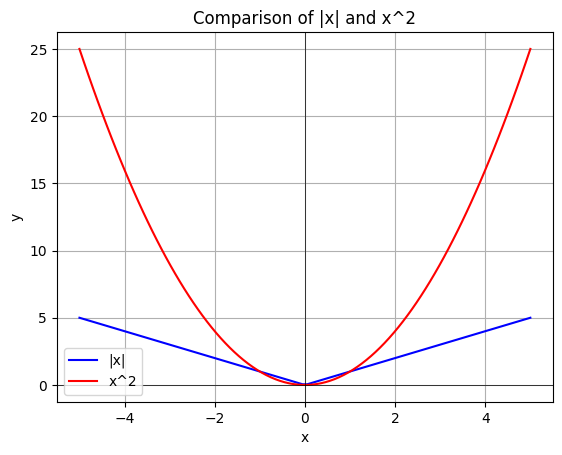

In [18]:
# Define the range of x values
x = np.linspace(-5, 5, 100)

# Compute the absolute value and squared value of x
abs_x = np.abs(x)
squared_x = x**2

# Plot the absolute value function
plt.plot(x, abs_x, label='|x|', color='blue')

# Plot the squared value function
plt.plot(x, squared_x, label='x^2', color='red')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of |x| and x^2')
plt.legend()

# Show the plot
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

In [ ]:
# Define the x-axis values
x = np.linspace(0, 10, 11)

# Define the y-axis values for the total error
total_error = np.array([0.5, 0.4, 0.3, 0.2, 0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

# Define the y-axis values for the bias
bias = np.array([0.25, 0.2, 0.15, 0.1, 0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25])

# Define the y-axis values for the variance
variance = np.array([0.25, 0.2, 0.15, 0.1, 0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25])

# Plot the total error
plt.plot(x, total_error, label="Total Error")

# Plot the bias
plt.plot(x, bias, label="Bias")

# Plot the variance
plt.plot(x, variance, label="Variance")

# Add a legend
plt.legend()

# Add a title
plt.title("Bias-Variance Tradeoff")

# Show the plot
plt.show()